<a href="https://colab.research.google.com/github/bforoura/GenAI/blob/main/Module8/chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

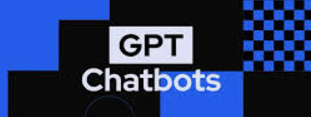

# **GPT-2 Chatbot Implementation**

* This is an implementation of a simple chatbot based on OpenAI's GPT-2 model.

* GPT-2 is a language model capable of generating human-like text based on a given input.

* Hugging Face offers a wide variety of pre-trained models, including GPT-2, that are available for download and use locally without the need for an **API key**.

* Available models:

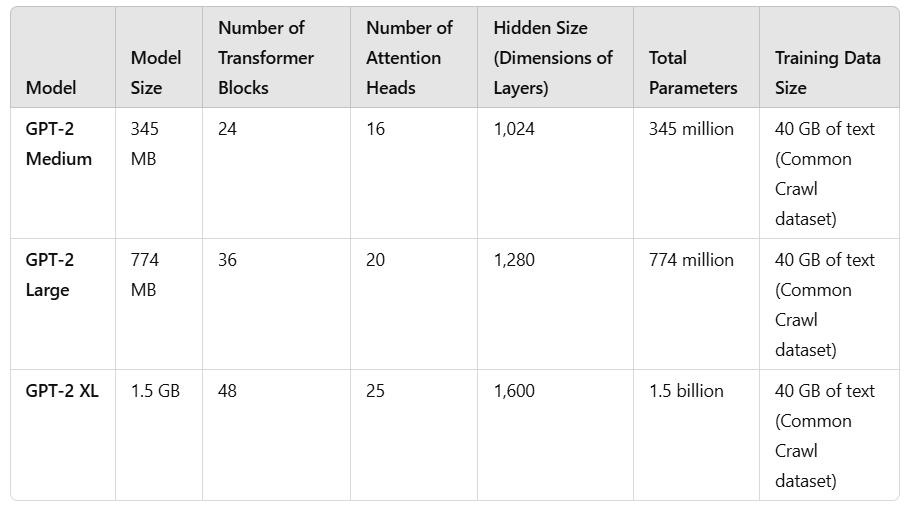

* If you're using **Hugging Face’s Inference API** to make model predictions directly on **their servers** (i.e., not downloading and running the model locally), then you would need an API key to authenticate and access the API for hosting models remotely.

* The **chatbot** is designed to interact with users, generate contextually relevant responses, and provide an engaging conversational experience.


* The code uses the transformers library from **Hugging Face** to load the pre-trained GPT-2 model and tokenizer, and PyTorch is used for handling the model’s operations.


* The chatbot supports features like **adjustable response length**, **temperature sampling**, and **top-k** or **top-p** sampling for more diverse and creative responses.

* Example: **Top-k=2** and **Top-p=0.85** Sampling:

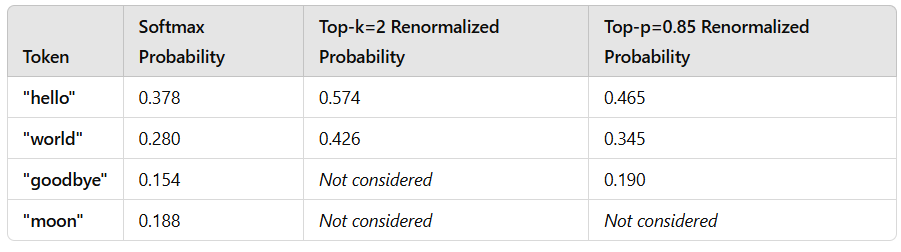


* The **pre-trained GPT-2 model** and its corresponding tokenizer are loaded using the from_pretrained method from the transformers library.

* The tokenizer is responsible for converting human-readable text into a format (tokens) that the model can understand, and vice versa.





**Sampling Parameters**

* To make the chatbot's responses more natural and less repetitive, several sampling techniques are used:

>>* **Temperature**: This parameter controls the randomness of the text generation. A higher temperature (e.g., 1.0) introduces more randomness and creativity, while a lower temperature (e.g., 0.2) makes the output more deterministic and focused.

>>* **Top-k Sampling**: This restricts the model to choose the next token from the **top k most likely options**, preventing it from picking less likely words that might cause nonsensical output.

>>* **Top-p Sampling (Nucleus Sampling)**: Instead of limiting the next token choices to the top k tokens, top-p considers the **smallest set of tokens whose cumulative probability exceeds the threshold p**, thus ensuring that the most probable, yet **diverse tokens** are chosen.



**Challenges and Limitations**

* **Repetition**
>* Initially, the chatbot might generate repetitive responses due to greedy decoding (always picking the most probable next word).
>* However, by enabling sampling and adjusting parameters like temperature, top-k, and top-p, the repetition is reduced, and the responses can become more varied and creative.

* **Context Awareness**
>* GPT-2 can generate coherent responses based on a single input but lacks long-term context awareness.
>* In a real-world conversation, where the context from previous interactions is important, the model might struggle to maintain a consistent conversation.
>* This limitation can be addressed by **fine-tuning the model** on domain-specific conversations or using a more sophisticated model like GPT-3 or GPT-4.

* **Response Quality**
>* While GPT-2 produces human-like responses, the quality of its responses can sometimes be inconsistent.
>* Fine-tuning or incorporating additional techniques, such as reinforcement learning from human feedback (RLHF), can improve the quality and relevance of the responses.

In [ ]:
!pip install transformers

# **model.eval()**

* The command **model.eval()** is used to set the model into evaluation mode, which is important for certain types of tasks, particularly when you are not training the model but instead using it for inference (e.g., generating text, making predictions, etc.).

* Pretrained models can be in either **training mode** or **evaluation mode**.
* When the model is in **evaluation** mode, it behaves differently compared to when it is in training mode, especially with regard to layers like:

>* **Dropout**: During training, dropout layers randomly set some of the units to zero to prevent overfitting. However, during **evaluation**, dropout is turned off, and all units are used.

>* **Batch Normalization**: Similar to dropout, batch normalization layers use different behavior during training and evaluation. During **training**, batch statistics are computed from the current batch, while during evaluation, they use statistics from the entire training set (or a running estimate).

* **Temperature**:

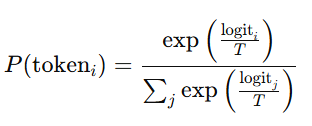
>* **T=1**: The softmax function behaves normally without any adjustments. The logits are directly used to compute the probabilities.
>* **T < 1**: The logits are sharpened, making the model more **deterministic**. The differences between token probabilities are exaggerated, and the model is more likely to pick the token with the highest logit.
Temperature
>* **T>1**: The logits are softened, making the model more **random**. The differences between token probabilities are reduced, leading to a more uniform distribution and allowing less likely tokens to be chosen.

In [1]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load a larger version of GPT-2
model_name = "gpt2-large"  # Change this to gpt2-medium, gpt2-large, or gpt2-xl for bigger models

# This loads the tokenizer for the GPT-2 model from Hugging Face's model hub.
# The tokenizer is responsible for converting text into tokens that can be processed by the model.
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# This loads the actual GPT-2 model architecture with pre-trained weights.
model = GPT2LMHeadModel.from_pretrained(model_name)

# Set the model to evaluation mode
model.eval()


def generate_response(prompt, max_length=100, temperature=0.7, top_k=50, top_p=0.9):
    input_ids = tokenizer.encode(prompt, return_tensors="pt")

    # Create attention mask
    # This means that initially, the attention mask is set to 1 for every token,
    # signaling that the model should attend to all tokens
    attention_mask = torch.ones(input_ids.shape, device=input_ids.device)


    # Generate response with attention mask and added parameters
    with torch.no_grad():
        output = model.generate(
            input_ids,
            attention_mask=attention_mask,
            max_length=max_length,
            temperature=temperature,
            top_k=top_k,
            top_p=top_p,
            num_return_sequences=1, # This will generate only one sequence of text based on the input prompt.
            pad_token_id=50256, # Make sure all sentences have the same length after padding, as necessary
            do_sample=True  # Enable sampling to use temperature, top_k, and top_p
        )

    response = tokenizer.decode(output[0], skip_special_tokens=True)
    return response

print("Chatbot: Hi there! How can I help you?")
while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        print("Chatbot: Goodbye!")
        break

    response = generate_response(user_input)
    print("Chatbot:", response)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Chatbot: Hi there! How can I help you?
You: How are you today?
Chatbot: How are you today? Is there anything you need to do today?"

"No, I am fine. I am fine."

"Is there something you need to do?"

"I am fine. I am fine."

"Is there something you need to do?"

"I am fine. I am fine."

"I am fine, I am fine, I am fine."

"I am fine, I am fine, I am fine
You: Why do you repeat yourself?
Chatbot: Why do you repeat yourself? I don't know. It's just kind of hard to explain.

"I don't know what the hell you're talking about. I don't know why you keep repeating yourself. I don't know what the hell you're talking about. I don't know what the hell you're talking about. I don't know what the hell you're talking about. I don't know what the hell you're talking about. I don't know what the hell
You: Did you know the pink elephant sang a loud song?
Chatbot: Did you know the pink elephant sang a loud song?
You: I know that very well. I hear it sing.
Chatbot: I know that very well. I hear it sing. 

KeyboardInterrupt: Interrupted by user